<a href="https://colab.research.google.com/github/pathilink/alura_time_series/blob/main/notebook/4_cafelura.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cafelura - Sales

## Libraries

In [1]:
import pandas as pd
import seaborn as sns
%matplotlib inline 
from matplotlib import pyplot as plt

## Data

In [2]:
from google.colab import drive

drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df_cafe = pd.read_csv("drive/MyDrive/Alura/Time Series/cafelura.csv")
df_cafe.head()

,mes,vendas
0,2017-01-31,880
1,2017-02-28,1600
2,2017-03-31,3240
3,2017-04-30,3840
4,2017-05-31,5670


In [4]:
df_cafe.rename(columns={'mes': 'month', 'vendas': 'sales'}, inplace=True)

In [9]:
print(f'Shape: {df_cafe.shape[0]} rows and {df_cafe.shape[1]} columns.\n')

print('Number of null data per column:')
df_cafe.isna().sum()



Shape: 24 rows and 2 columns.

Number of null data per column:


month    0
sales    0
dtype: int64

In [10]:
print('Variable types:') 
df_cafe.dtypes

Variable types:


month    object
sales     int64
dtype: object

In [11]:
df_cafe['month'] = pd.to_datetime(df_cafe['month'])
df_cafe.dtypes

month    datetime64[ns]
sales             int64
dtype: object

In [16]:
def plot_function(title, labelx, labely, x, y, dataset):
  sns.set_palette('Accent')
  sns.set_style('darkgrid')
  ax = sns.lineplot(x=x, y=y, data=df_cafe)
  ax.figure.set_size_inches(12, 6)
  ax.set_title(title, loc='left', fontsize=18)
  ax.set_xlabel(labelx, fontsize = 14)
  ax.set_ylabel(labely, fontsize = 14)
  ax = ax

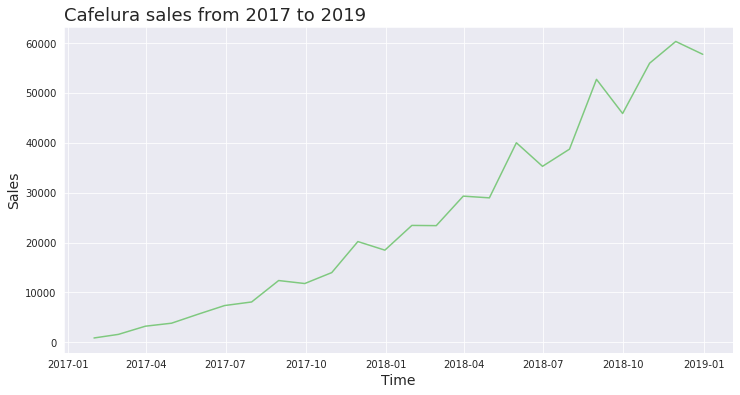

In [18]:
plot_function('Cafelura sales from 2017 to 2019', 'Time', 'Sales', 'month', 'sales', df_cafe)

## Normalization

Corrects noise

In [19]:
df_quantity_weekend_days = pd.read_csv("drive/MyDrive/Alura/Time Series/dias_final_de_semana.csv")
df_quantity_weekend_days.head()

,quantidade_de_dias
0,8
1,8
2,10
3,8
4,9


In [20]:
df_quantity_weekend_days['quantidade_de_dias'].values

array([ 8,  8, 10,  8,  9,  9,  8, 10,  8,  8, 10,  8,  9,  8,  9,  8, 10,
        8,  8, 10,  8,  9,  9,  8])

In [21]:
df_cafe['normalized_sales'] = df_cafe['sales'] / df_quantity_weekend_days['quantidade_de_dias'].values
df_cafe.head()

,month,sales,normalized_sales
0,2017-01-31,880,110.0
1,2017-02-28,1600,200.0
2,2017-03-31,3240,324.0
3,2017-04-30,3840,480.0
4,2017-05-31,5670,630.0


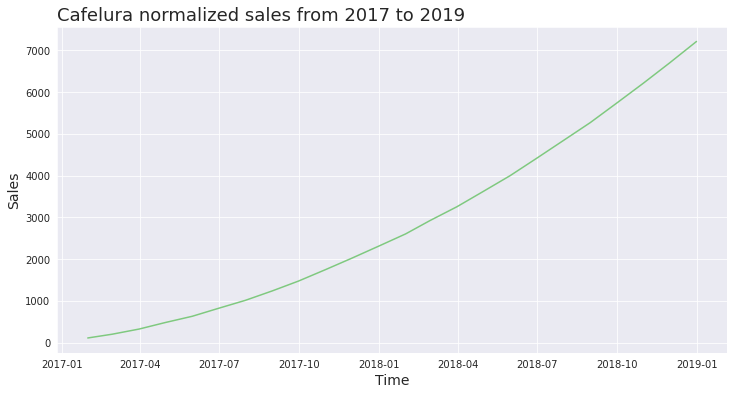

In [22]:
plot_function('Cafelura normalized sales from 2017 to 2019', 'Time', 'Sales', 'month', 'normalized_sales', df_cafe)

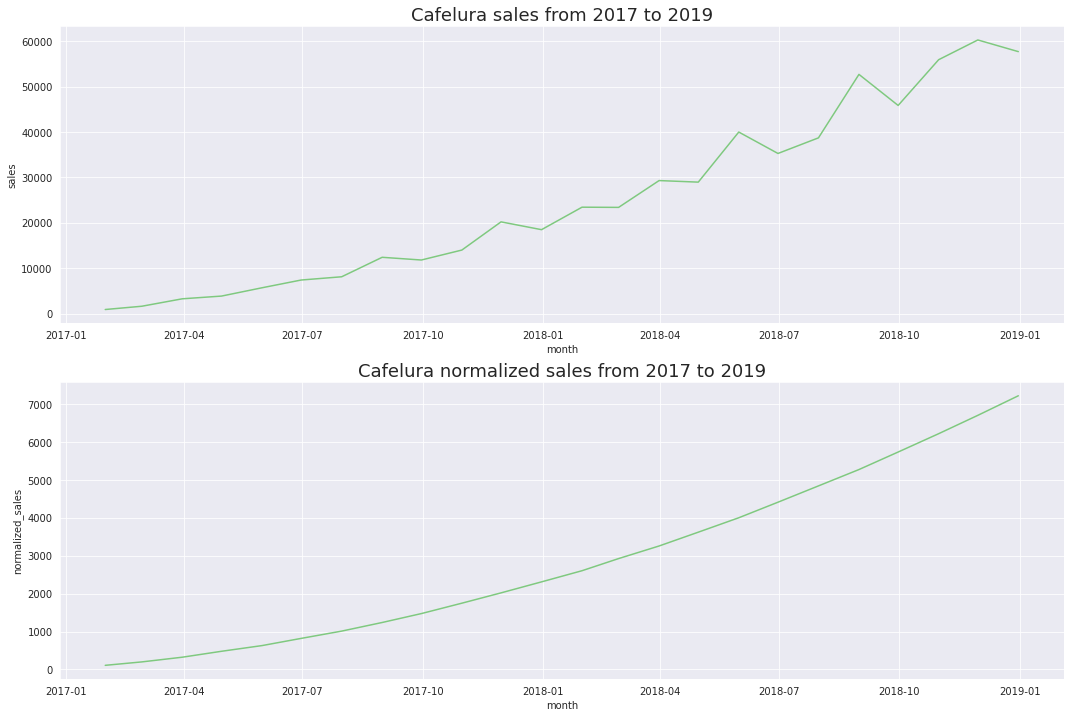

In [25]:
plt.figure(figsize=(18,12))
ax=plt.subplot(2,1,1)
ax.set_title('Cafelura sales from 2017 to 2019', fontsize=18)
sns.lineplot(x='month', y='sales', data=df_cafe)
ax=plt.subplot(2,1,2)
ax.set_title('Cafelura normalized sales from 2017 to 2019', fontsize=18)
sns.lineplot(x='month', y='normalized_sales', data=df_cafe)
ax=ax 